# Muon Decay Time

Here's a [nice tutorial](https://bespokeblog.wordpress.com/2011/07/11/basic-data-plotting-with-matplotlib-part-3-histograms/) on plotting histograms.

The [csv package](https://pymotw.com/2/csv/) is useful for parsing data. It can be used to parse data with any delimiter, including tab-delimited, space-delimited, or comma-delimited data.

In [1]:
import csv #used for reading and parsing data from a text file
from __future__ import print_function #used for print() function
import matplotlib.pyplot as plt #used for graphing
from numpy import * #used for curve fit
from scipy.optimize import curve_fit

In [2]:
#show graphs inline (do not use for print publication quality graphs)
%matplotlib inline

In [4]:
#open and read the file
datafile = csv.reader(open('15-09-18.txt', 'rt'), delimiter=' ')
rows=[]
decaytimes=[] #list of decay times
for row in datafile:
    rows.append(row)
    data1=float(row[0])
    if data1<40000:
        decaytimes.append(data1/1000) #convert to microseconds from nanoseconds and append to list
print("Number of decayed muons: ",len(decaytimes))

Number of decayed muons:  2591


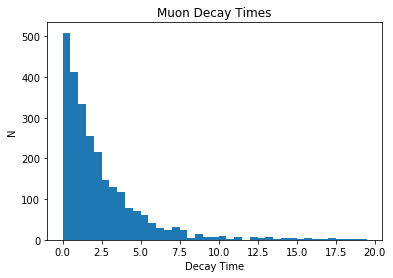

In [5]:
frequencyhistogram= plt.figure()
counts, bins, bars=plt.hist(decaytimes,bins=arange(0, 20, 0.5))
plt.title("Muon Decay Times")
plt.xlabel("Decay Time")
plt.ylabel("N")
plt.show()

In [6]:
print(counts)
print(bins)

[ 509.  412.  335.  256.  215.  146.  131.  117.   77.   71.   60.   41.
   30.   25.   32.   24.    5.   15.    7.    8.    9.    1.    6.    0.
    7.    4.    7.    2.    5.    5.    3.    4.    3.    2.    4.    3.
    2.    1.    1.]
[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5]


In [7]:
ydata=[] #ln(N)
xdata=[] #t

#cannot calculate ln(0)
#only plot data before N becomes negative (after subtracting background)
i=0
for c in counts:
    if(c<7): break
    ydata.append(log(c-6)) #subtract off background counts using N_background=6
    xdata.append((bins[i+1]+bins[i])/2)
    i=i+1
#print(ydata,xdata)

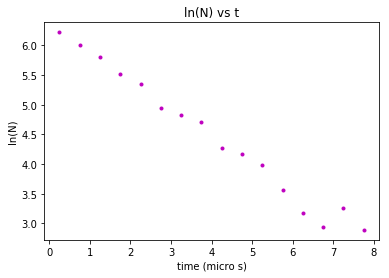

In [8]:
#semi-log plot
plt.title('ln(N) vs t')
plt.xlabel('time (micro s)')
plt.ylabel('ln(N)')
plt.plot(xdata,ydata,'m.')
plt.show()

In [9]:
#function takes arrays of data and returns an array
def func(x, a, b):
    return a*x+b #linear function

In [10]:
#convert list to a numpy array
yarray=asarray(ydata)
xarray=asarray(xdata)
popt, pcov = curve_fit(func, xarray, yarray)
print(popt,pcov)

[-0.4641762   6.33286998] [[ 0.00025394 -0.00101574]
 [-0.00101574  0.00541201]]


In [11]:
p1 = popt[0] #slope
p2 = popt[1] #intercept
residuals = yarray - func(xarray,p1,p2) #difference in y data and y best fit function
ressquared = sum(residuals**2)
print(ressquared) #sum of square of residuals

0.302183695857


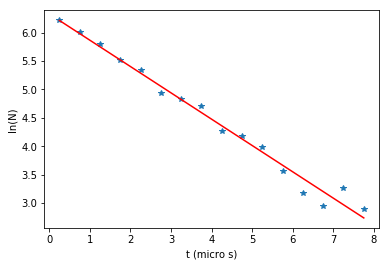

In [12]:
bestfit=func(xarray,p1,p2) #best fit function
plt.plot(xdata,ydata,'*') #plot data
plt.plot(xdata,bestfit,'r') #plot best fit function
plt.xlabel('t (micro s)')
plt.ylabel('ln(N)');

In [13]:
tau=-1/p1
print(tau) #muon lifetime

2.15435432341


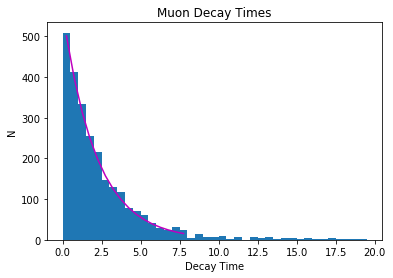

In [17]:
frequencyhistogram= plt.figure()
counts, bins, bars=plt.hist(decaytimes,bins=arange(0, 20, 0.5))
expfunc=exp(p2)*exp(-1/tau*xarray) #best fit function for N(t)
plt.plot(xdata,expfunc,'m')
plt.title("Muon Decay Times")
plt.xlabel("Decay Time")
plt.ylabel("N")
plt.show()